In [1]:
!nvidia-smi

Wed Oct 30 14:20:12 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

 # copy the entire dataset directory from /kaggle/input to /kaggle/working:

In [ ]:
!cp -r /kaggle/input/previos-runs/run /kaggle/working/runs

# copy one file

In [ ]:
import os
import yaml
import shutil

# Define paths
input_yaml_path = '/kaggle/input/training/data.yaml'
output_yaml_path = '/kaggle/working/Dataset/data.yaml'

# Check if the input YAML file exists
if os.path.exists(input_yaml_path):
    # Copy the YAML file from input directory to output directory
    shutil.copyfile(input_yaml_path, output_yaml_path)
    print(f"Copied {input_yaml_path} to {output_yaml_path}")

Verify the Copy

In [2]:
!ls '/kaggle/working/'

Dataset  runs  state.db  yolov8n.pt


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!pip install ultralytics


from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.52 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.5/8062.4 GB disk)


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(8)
dataset = version.download("")


# Clear output folder


In [ ]:
import os

def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working/'
remove_folder_contents(folder_path)
#os.rmdir(folder_path)

In [ ]:
import yaml

# Load the YAML file
with open('/kaggle/working/Dataset/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update the 'names' list by removing the first character of each name
data['names'] = [name[1:] for name in data['names']]

# Update the 'train' and 'val' paths
data['train'] = '/kaggle/working/Dataset/train/images'
data['val'] = '/kaggle/working/Dataset/valid/images'

# Save the updated YAML file
with open('/kaggle/working/Dataset/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)


# Train the model

In [6]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Note: you may need to restart the kernel to use updated packages.


In [ ]:
%cd {HOME}

!yolo train resume model=/kaggle/working/runs/detect/train/weights/last.pt data=/kaggle/working/Dataset/data.yaml epochs=300 imgsz=800 device=0,1

/kaggle/working
New https://pypi.org/project/ultralytics/8.2.53 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.52 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train/weights/last.pt, data=/kaggle/working/Dataset/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/kaggle/working/runs/detect/train/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn

In [5]:
ls {HOME}/runs/detect/train/

args.yaml
events.out.tfevents.1720515172.06ab4620e2ac.145.0
events.out.tfevents.1720533673.a1bb8ff362db.116.0
events.out.tfevents.1720579060.645d17b7be19.113.0
events.out.tfevents.1720623662.066505c5ee76.240.0
events.out.tfevents.1720628523.1c811f2704f0.113.0
events.out.tfevents.1720651818.1c811f2704f0.462.0
labels.jpg
labels_correlogram.jpg
results.csv
weights/


/kaggle/working


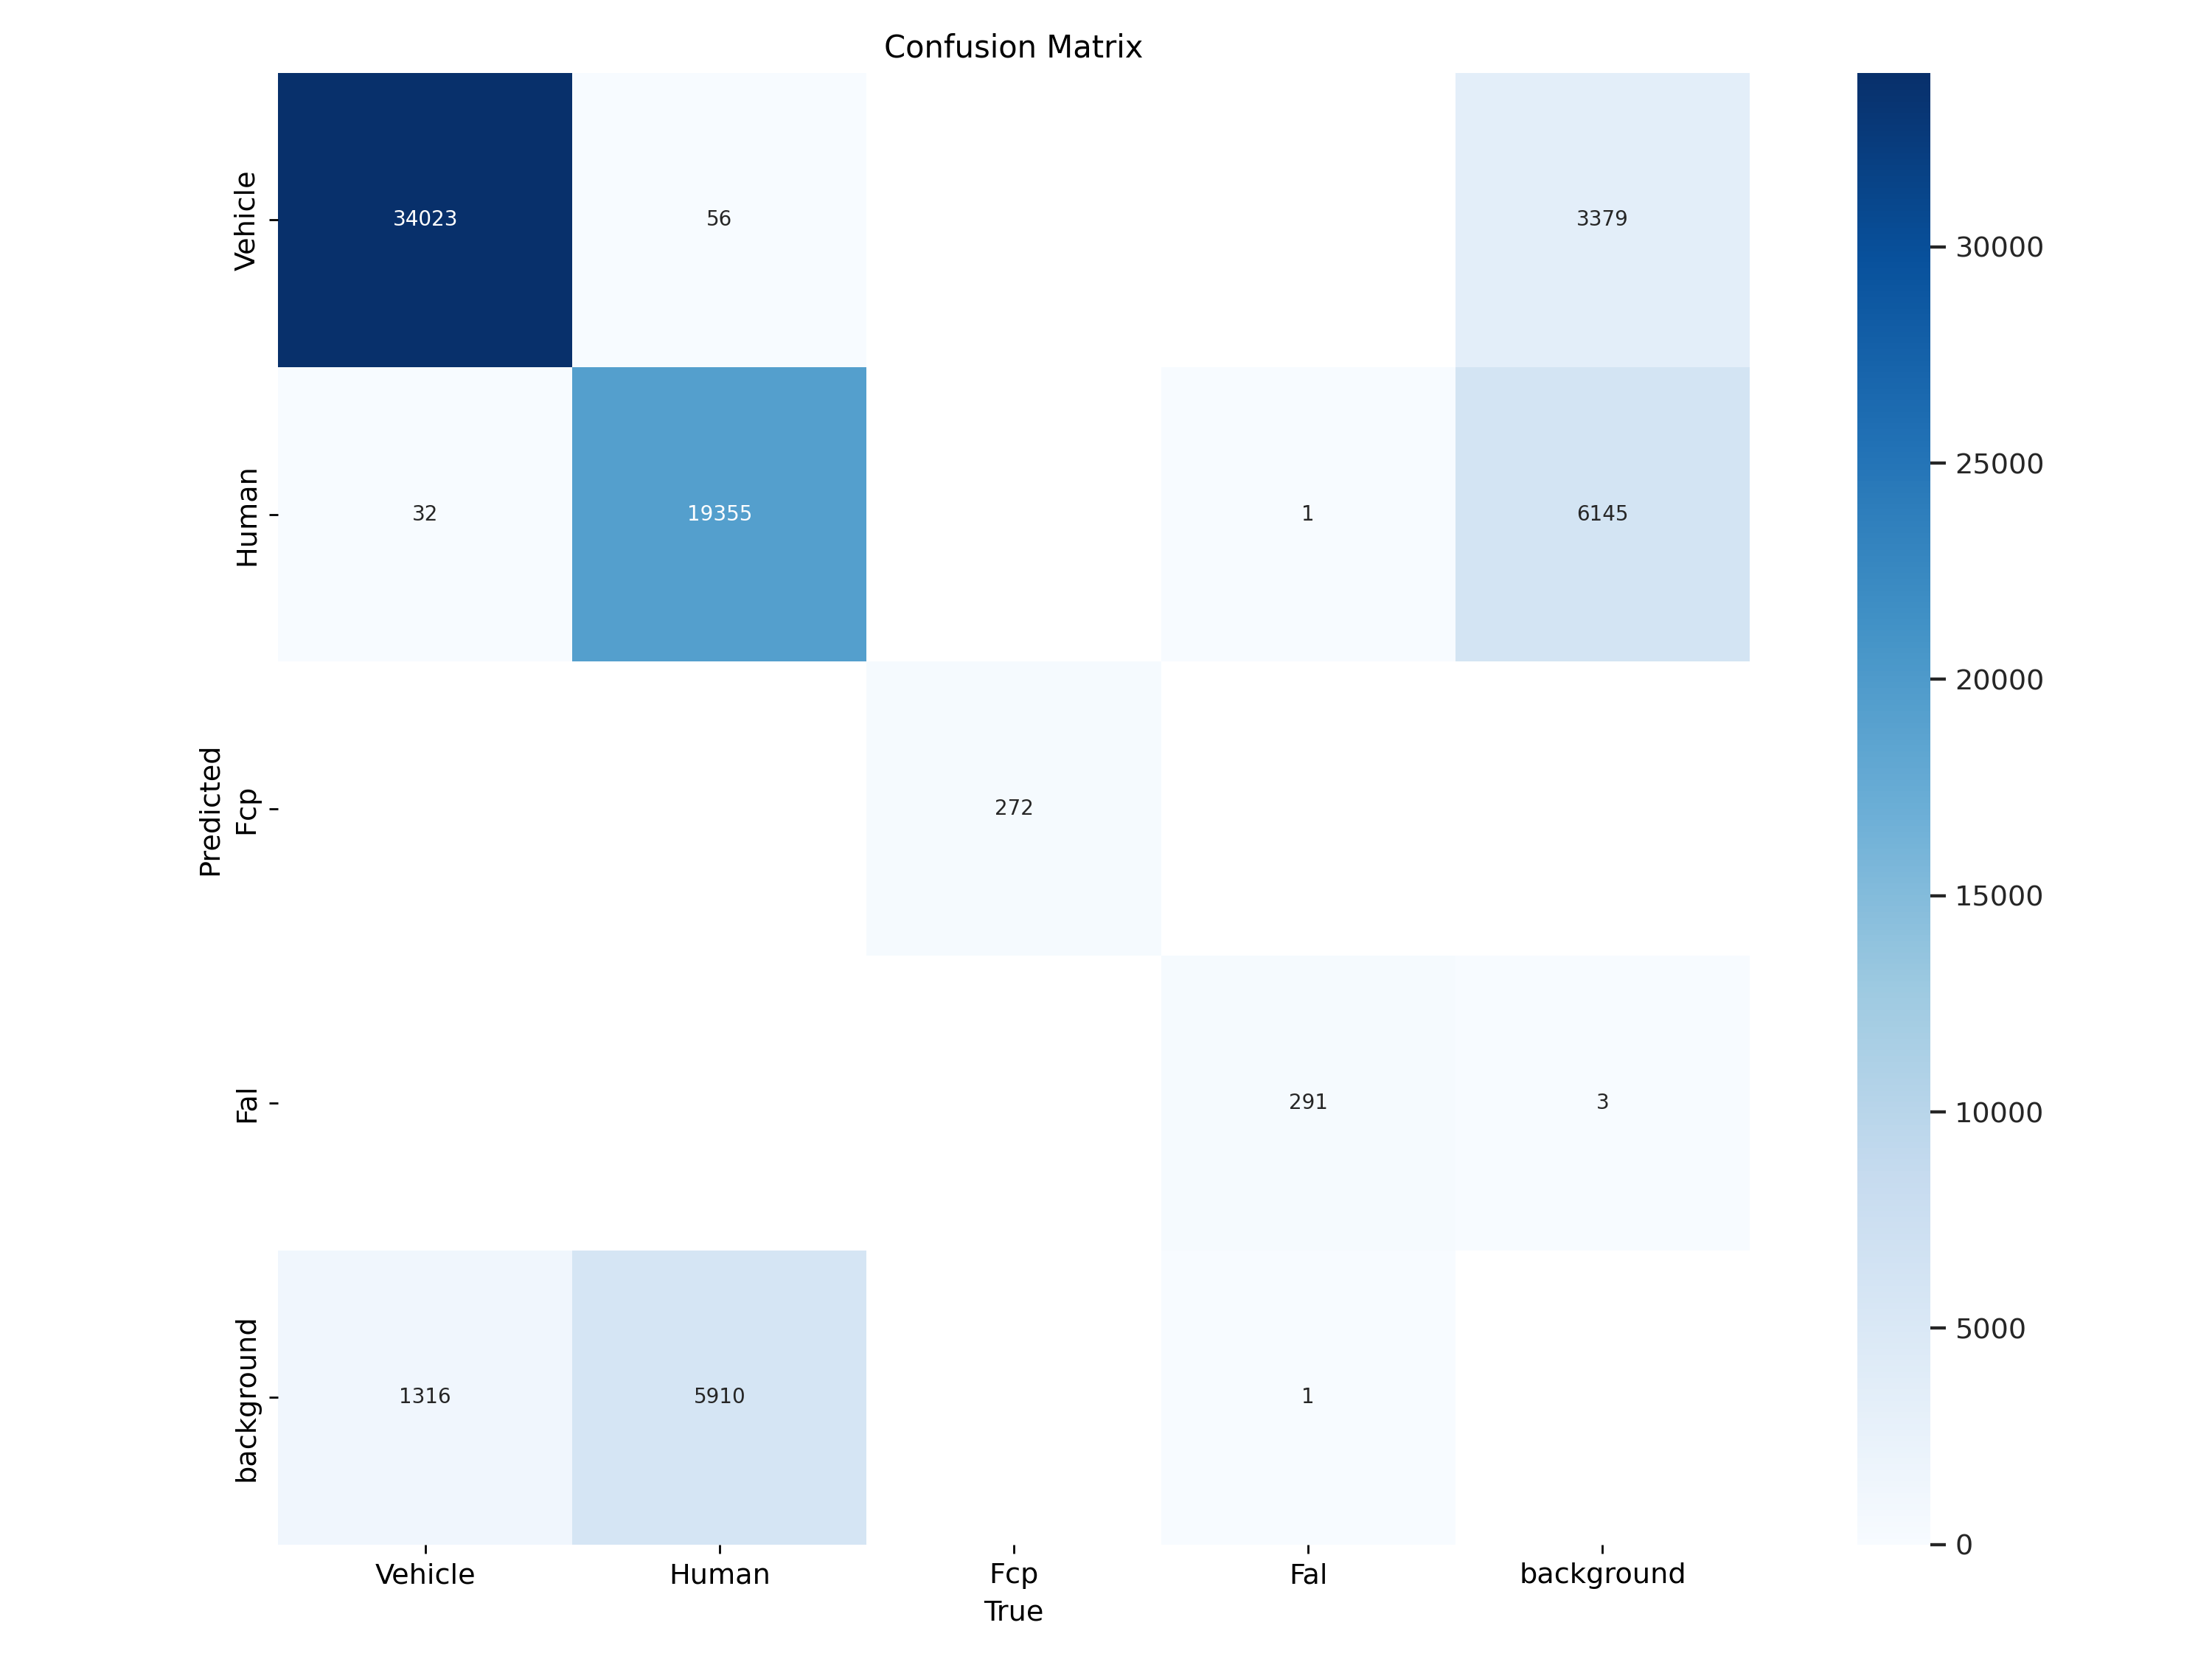

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=800) 

/kaggle/working


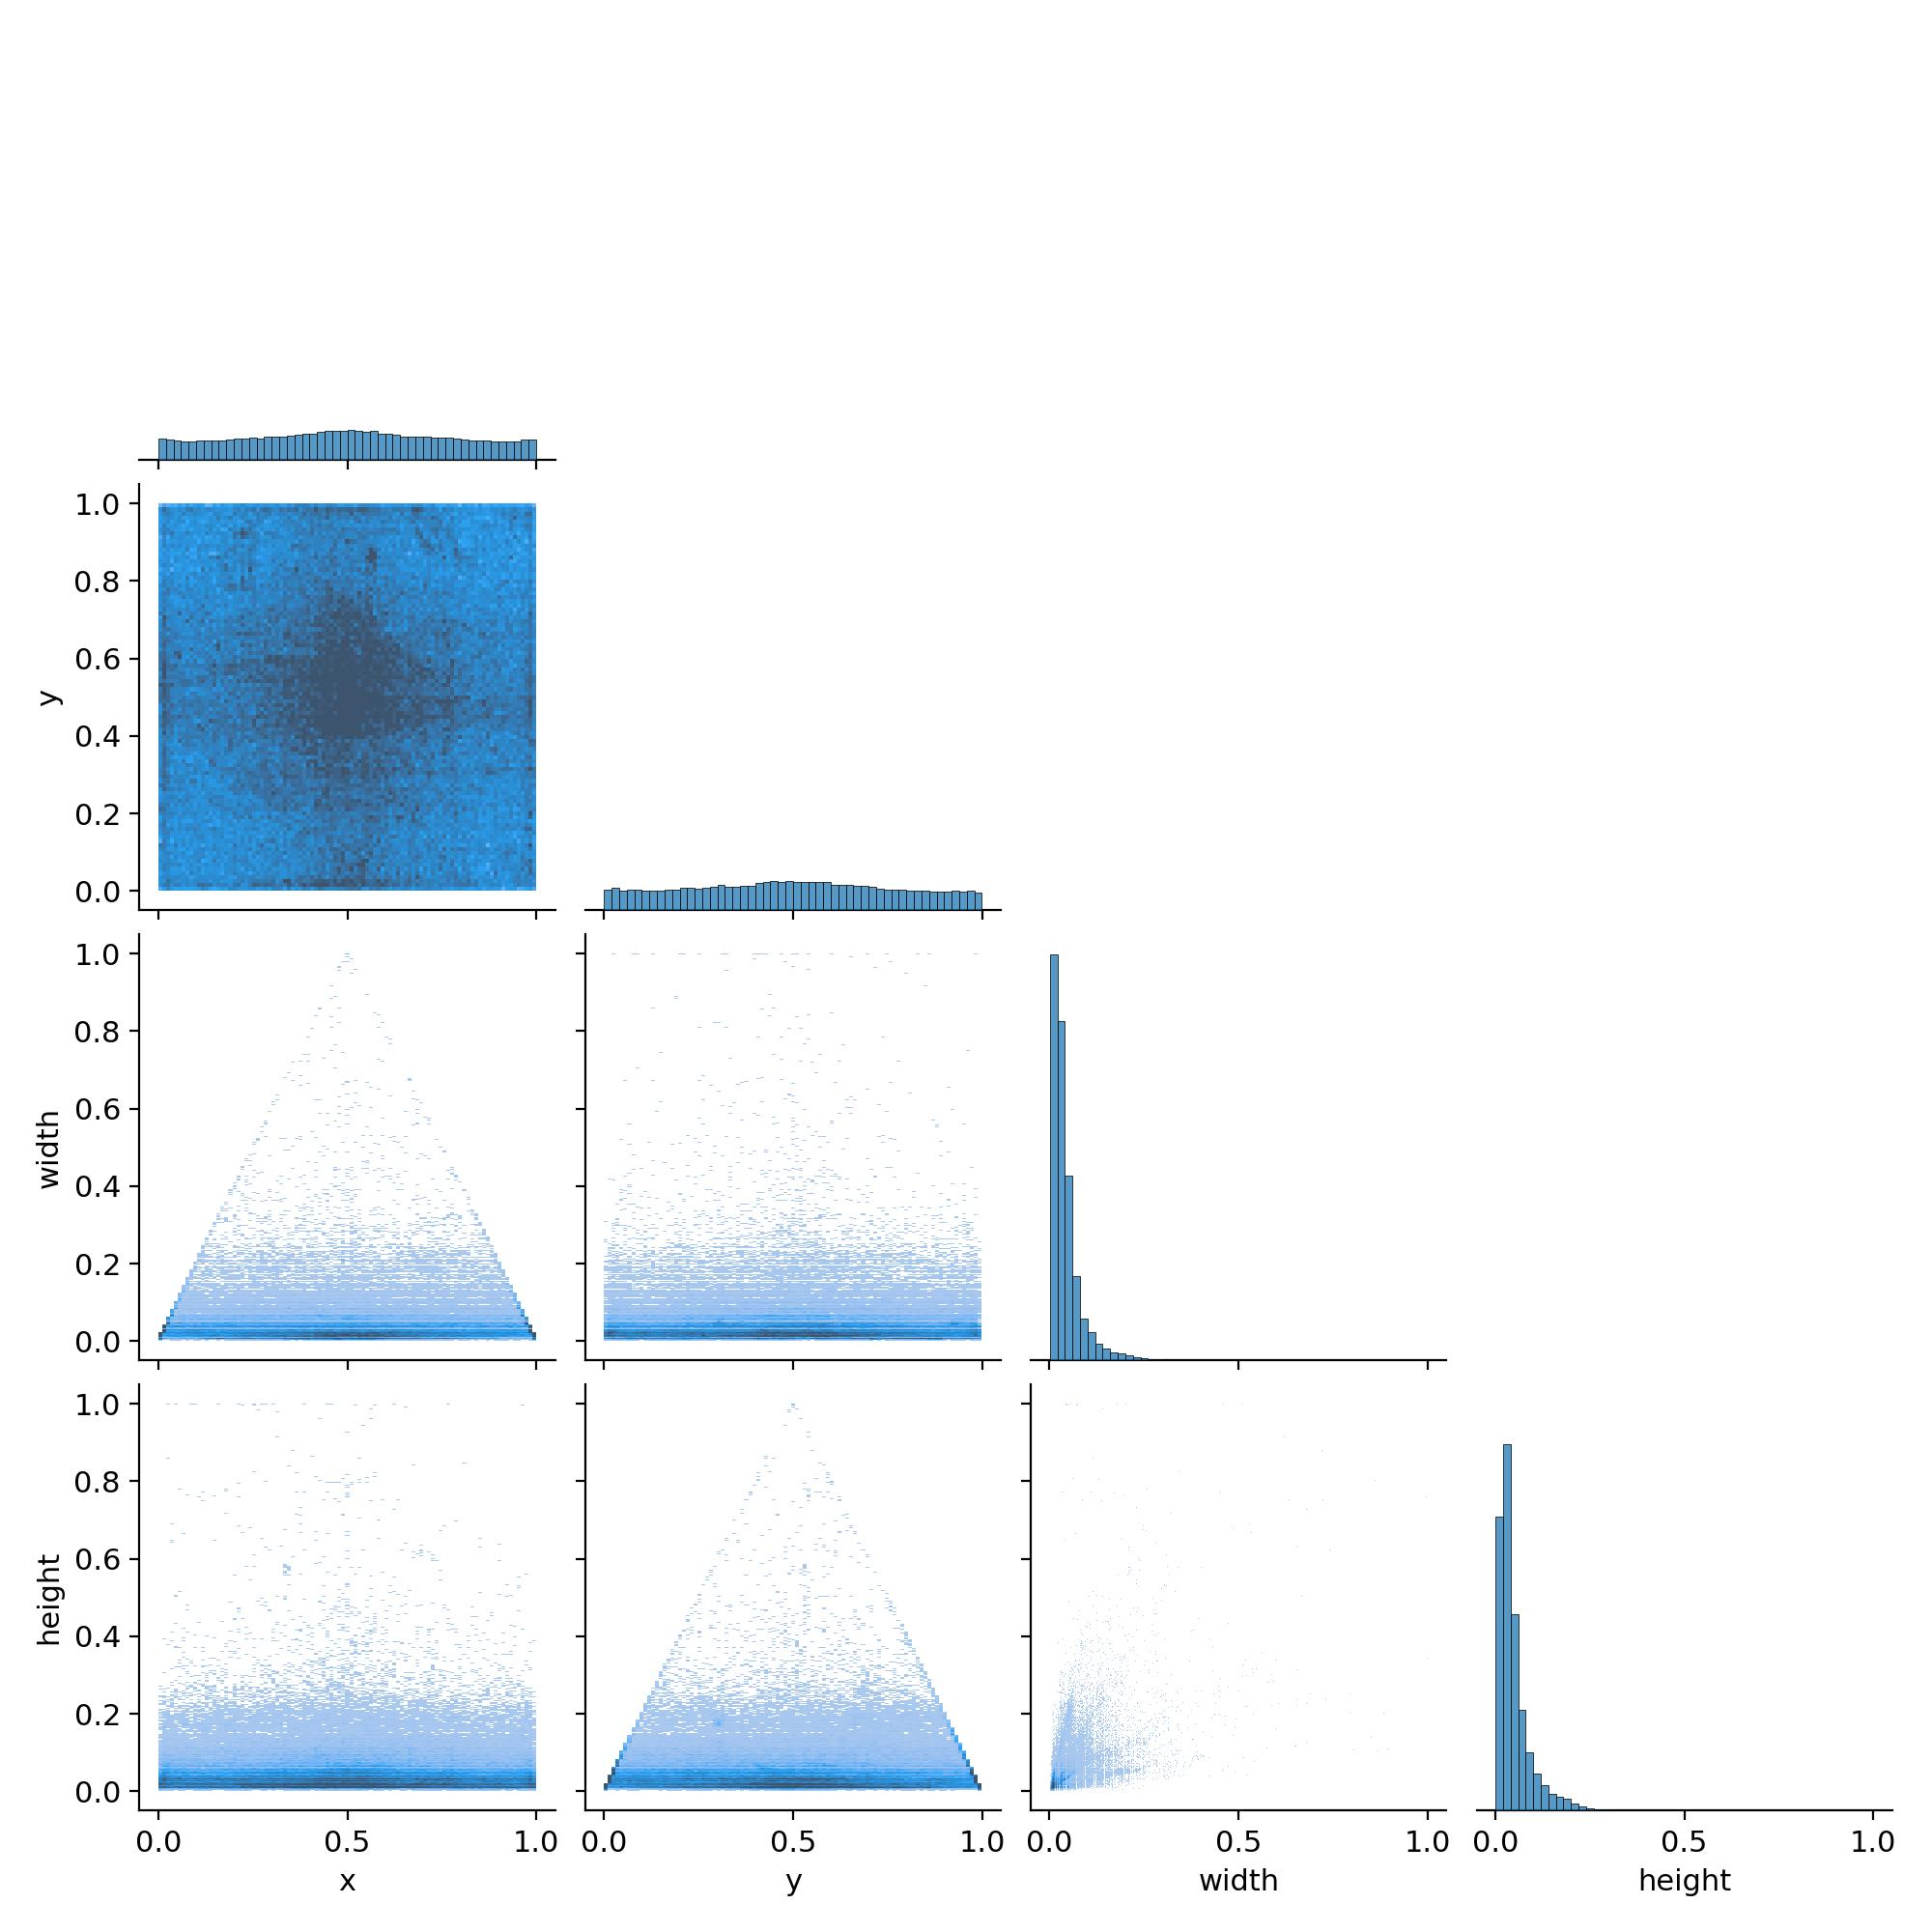

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=600)

/kaggle/working


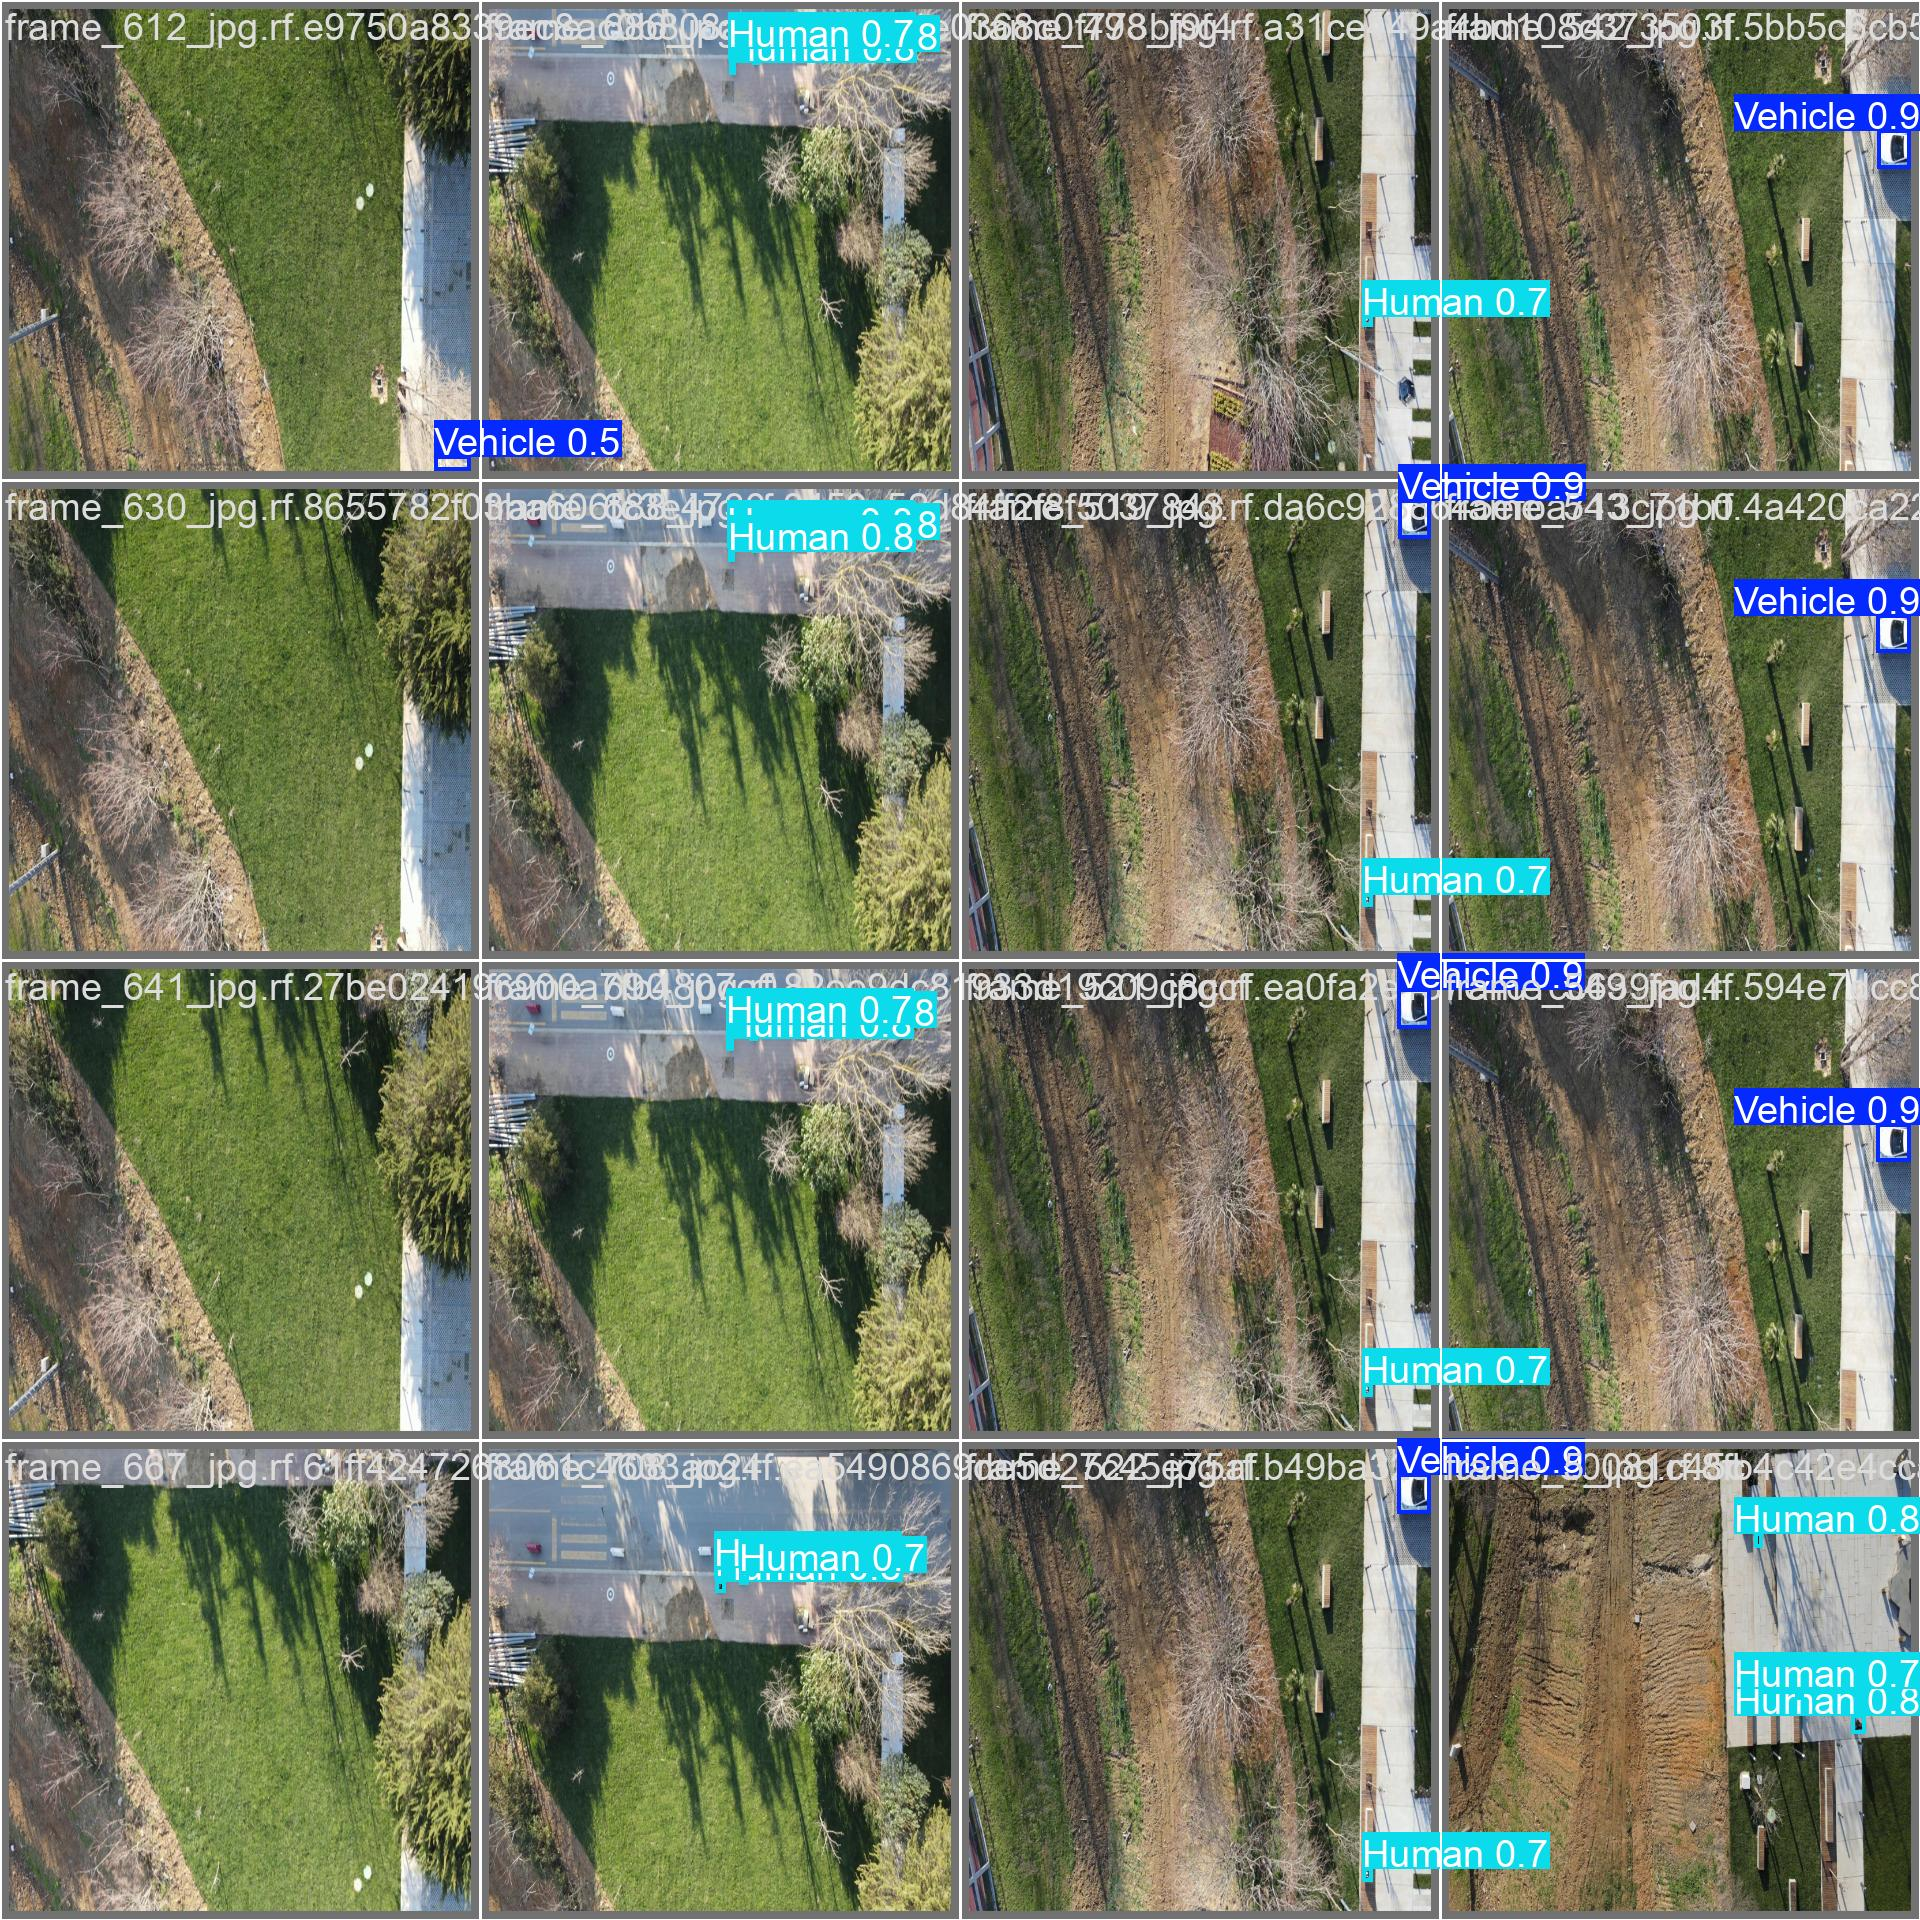

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

#  this after train finish to move runs to drive

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/Dataset/test/images save=True

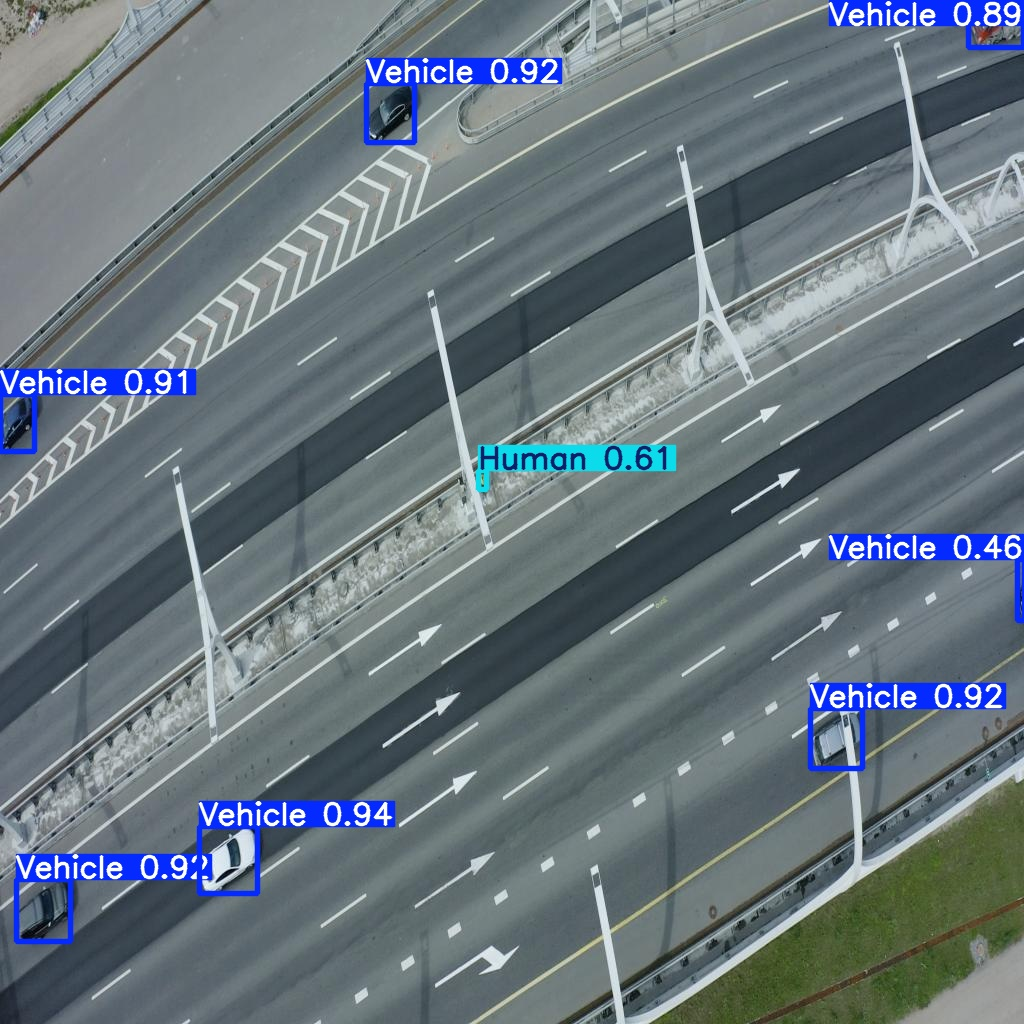

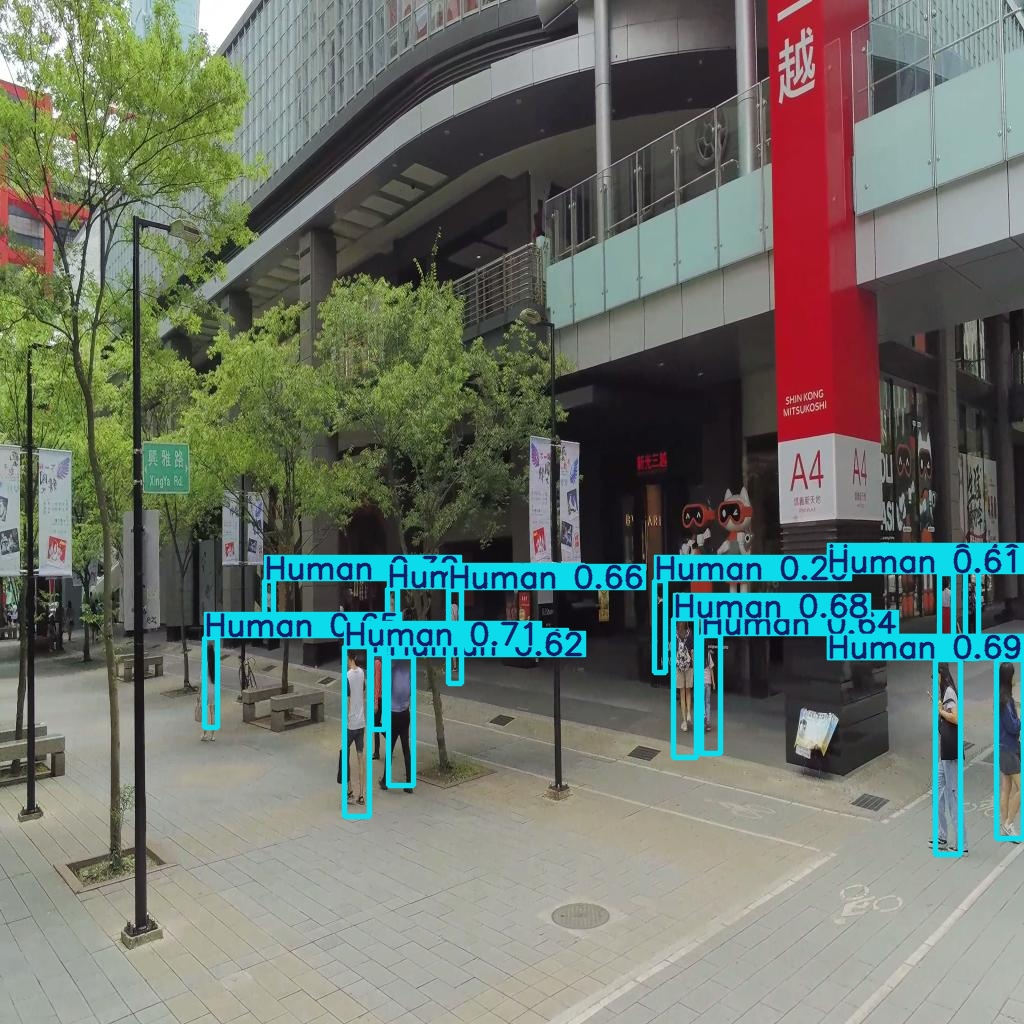

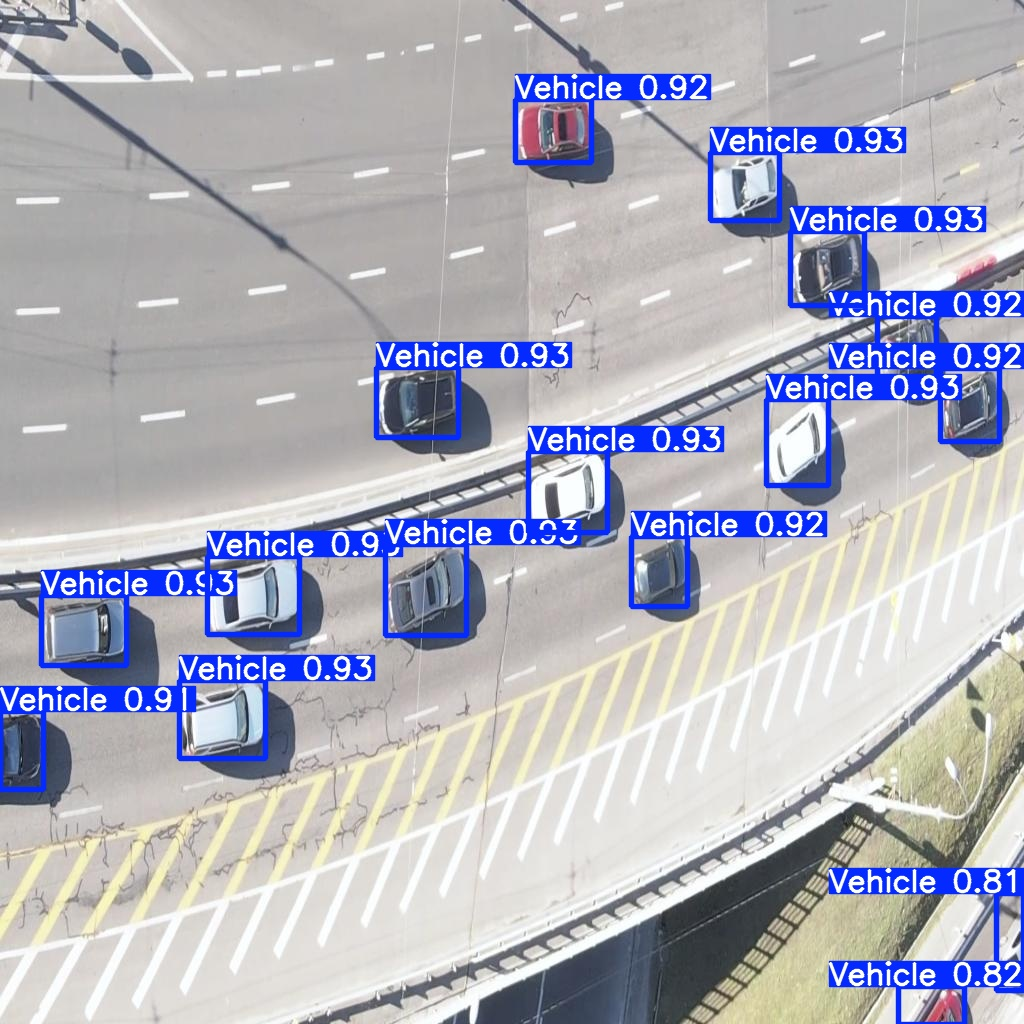

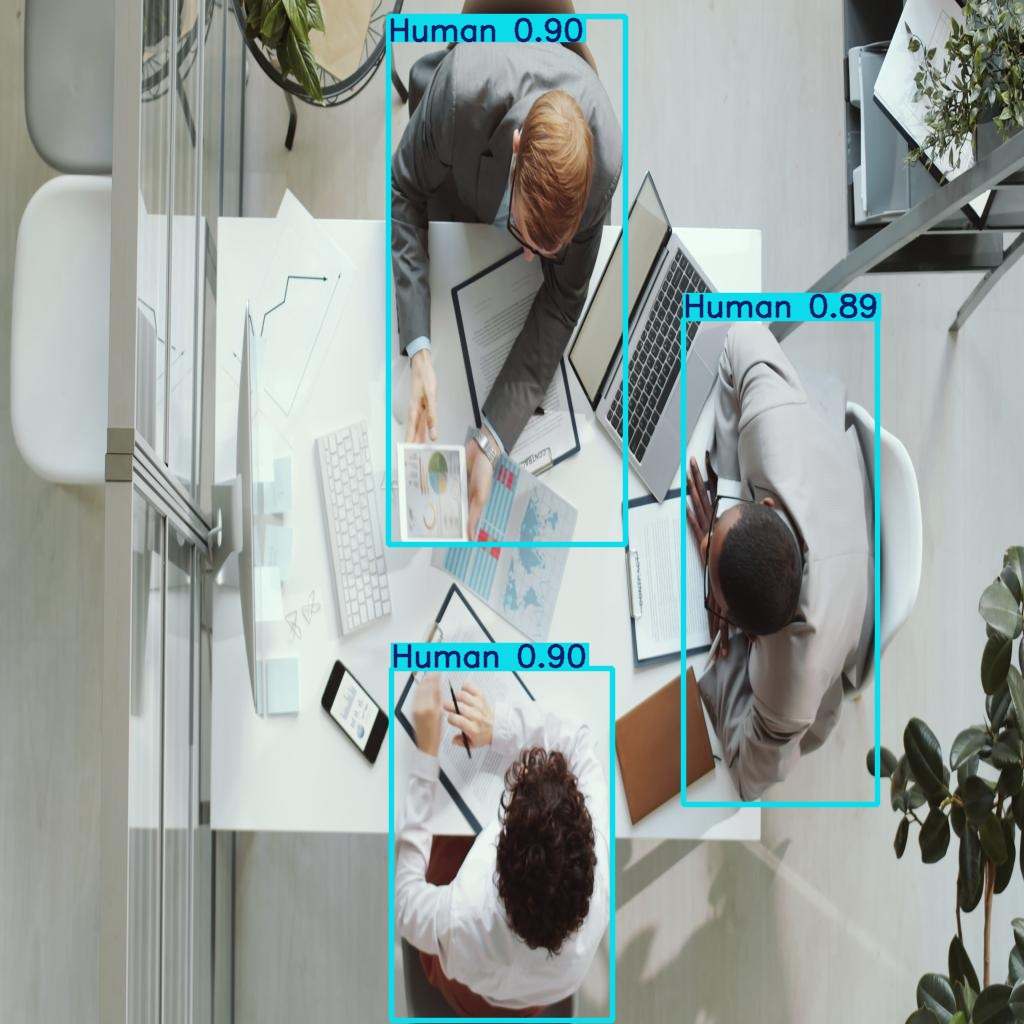

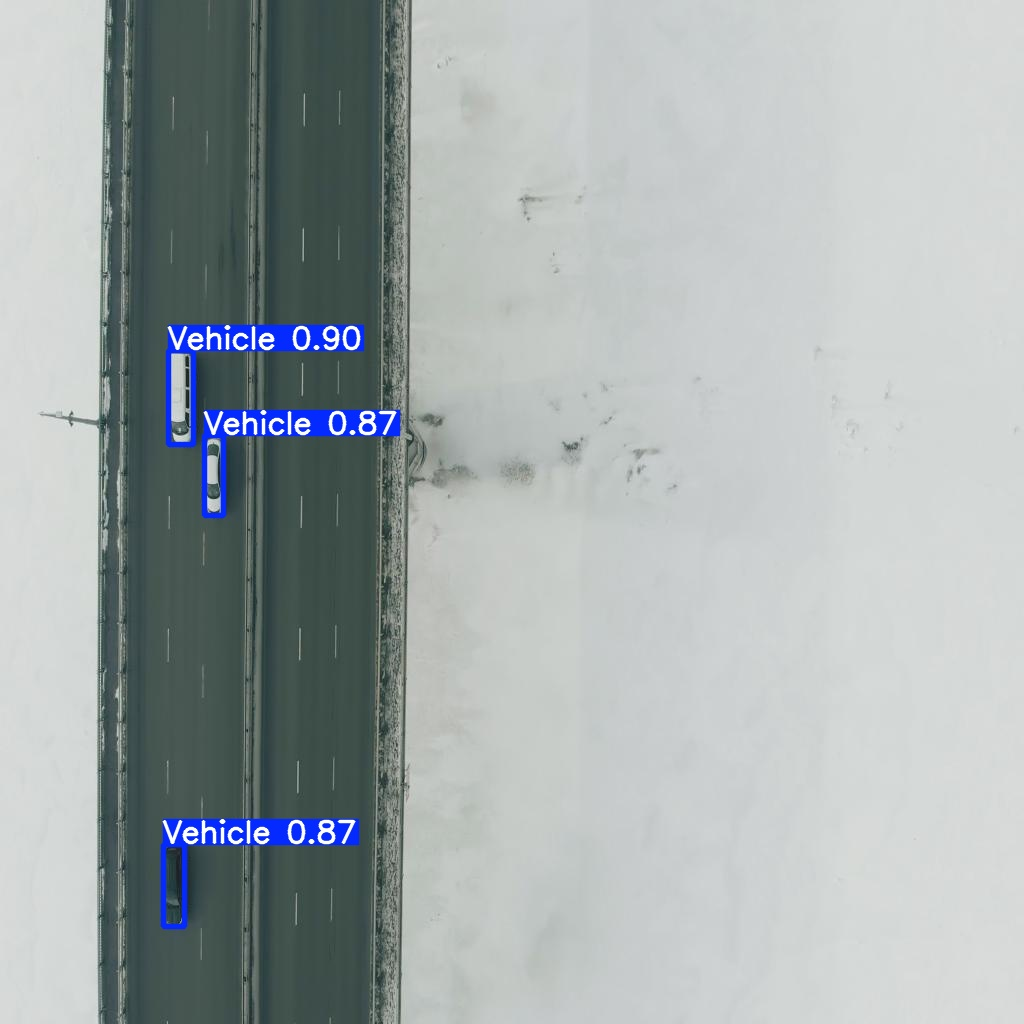

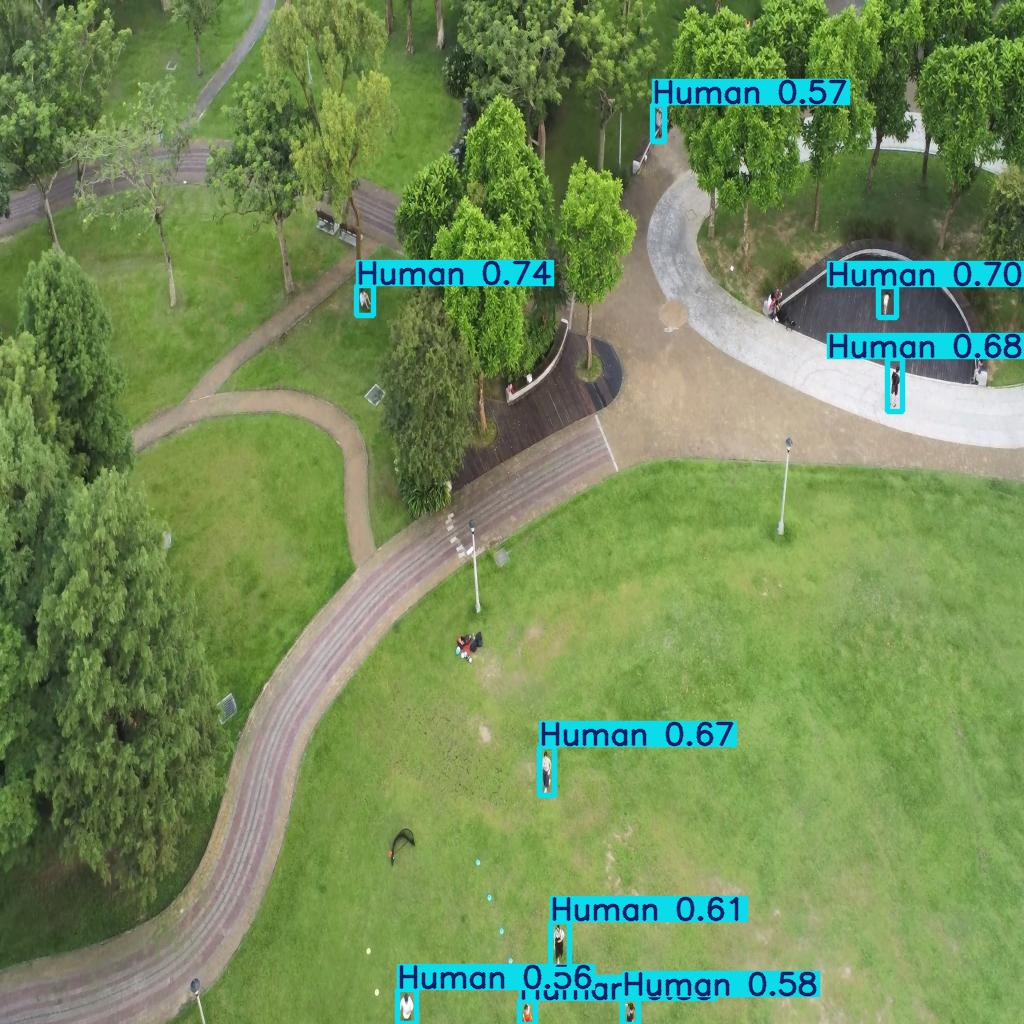

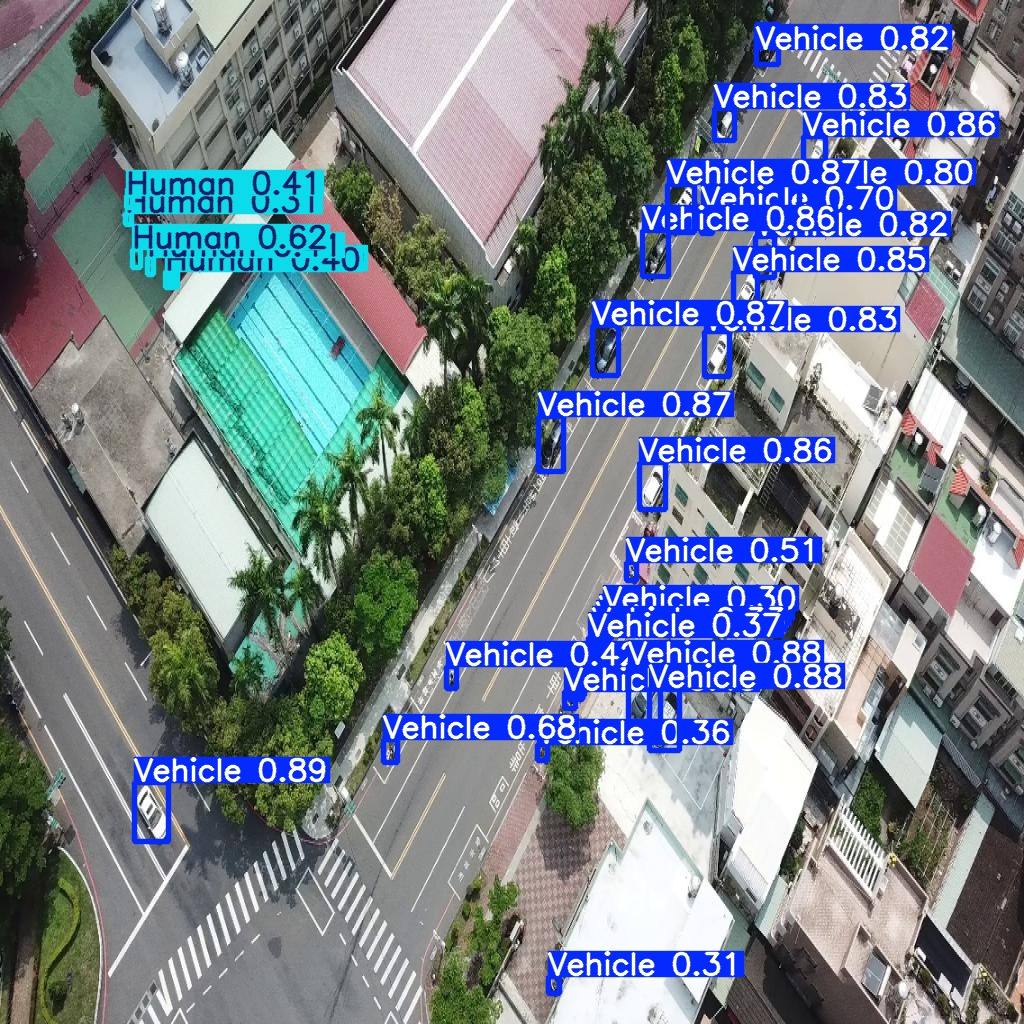

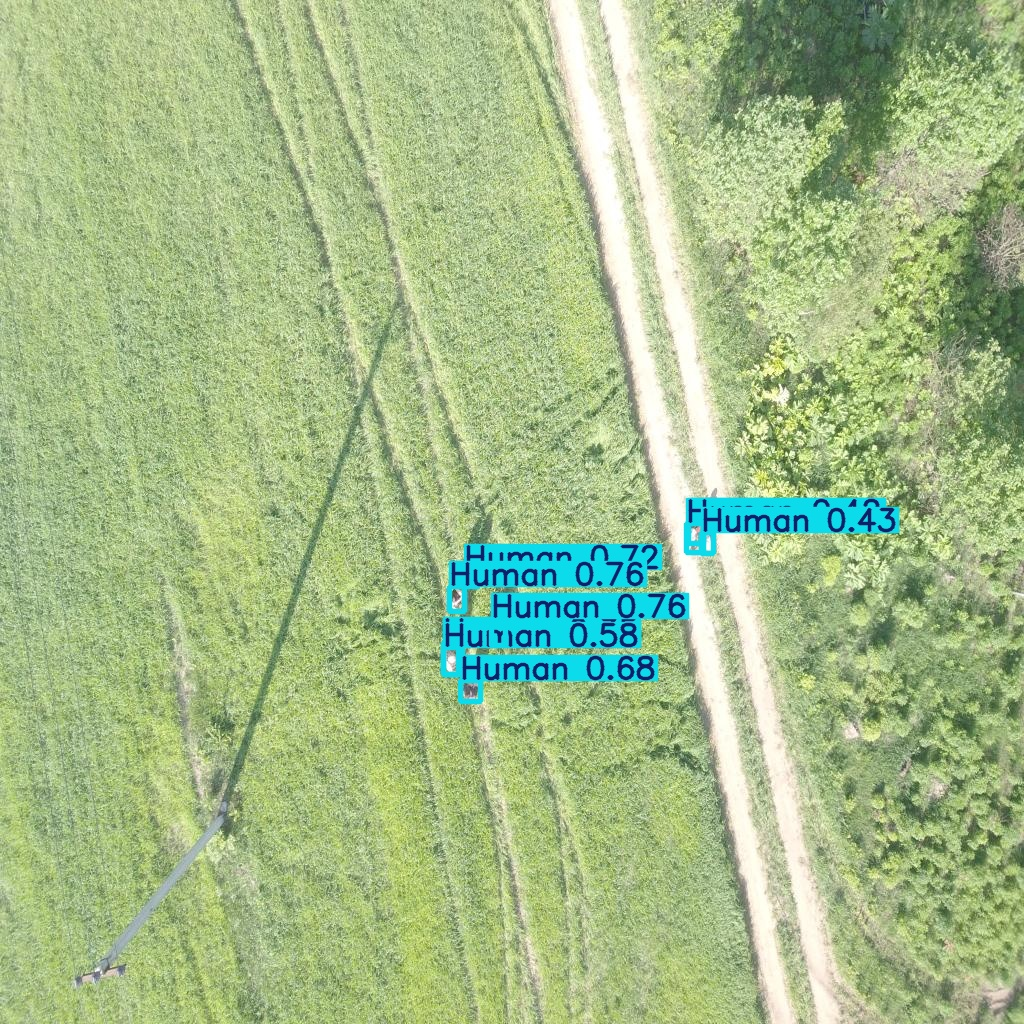

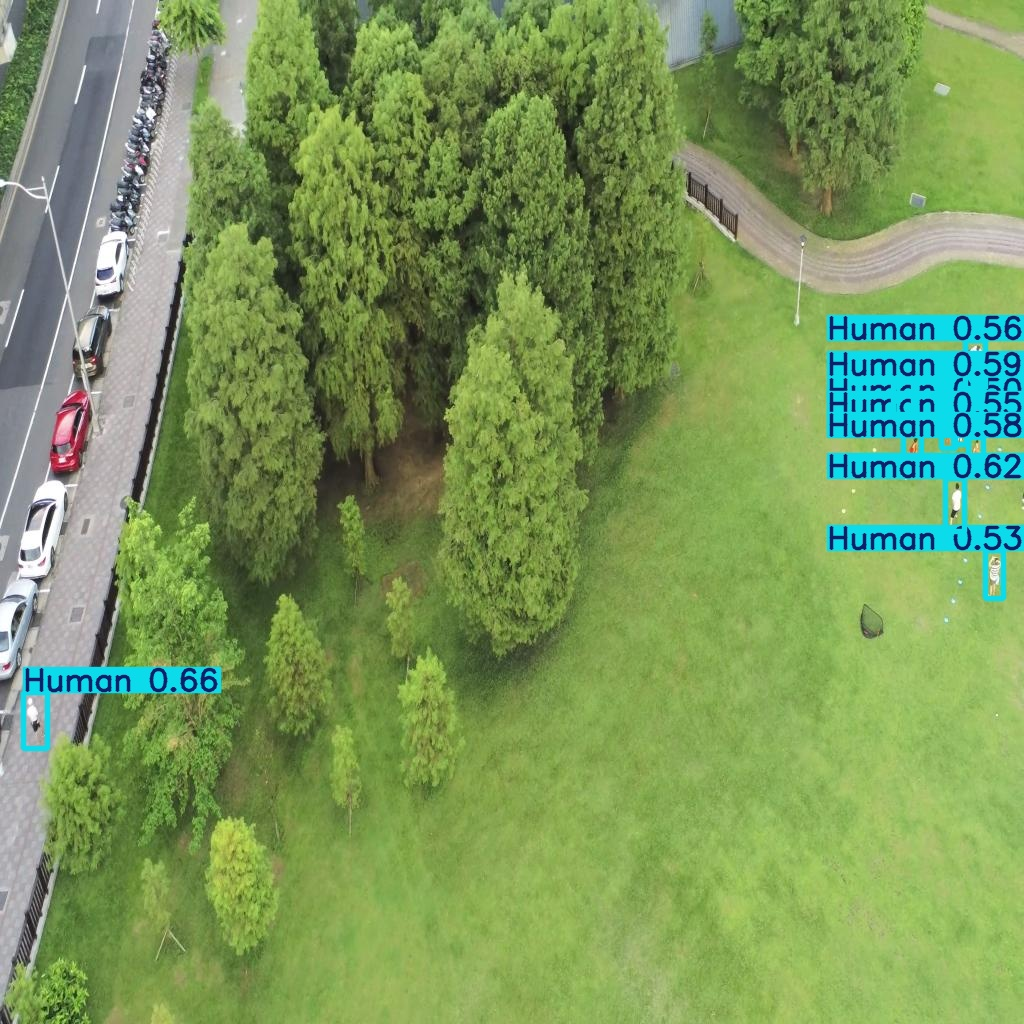

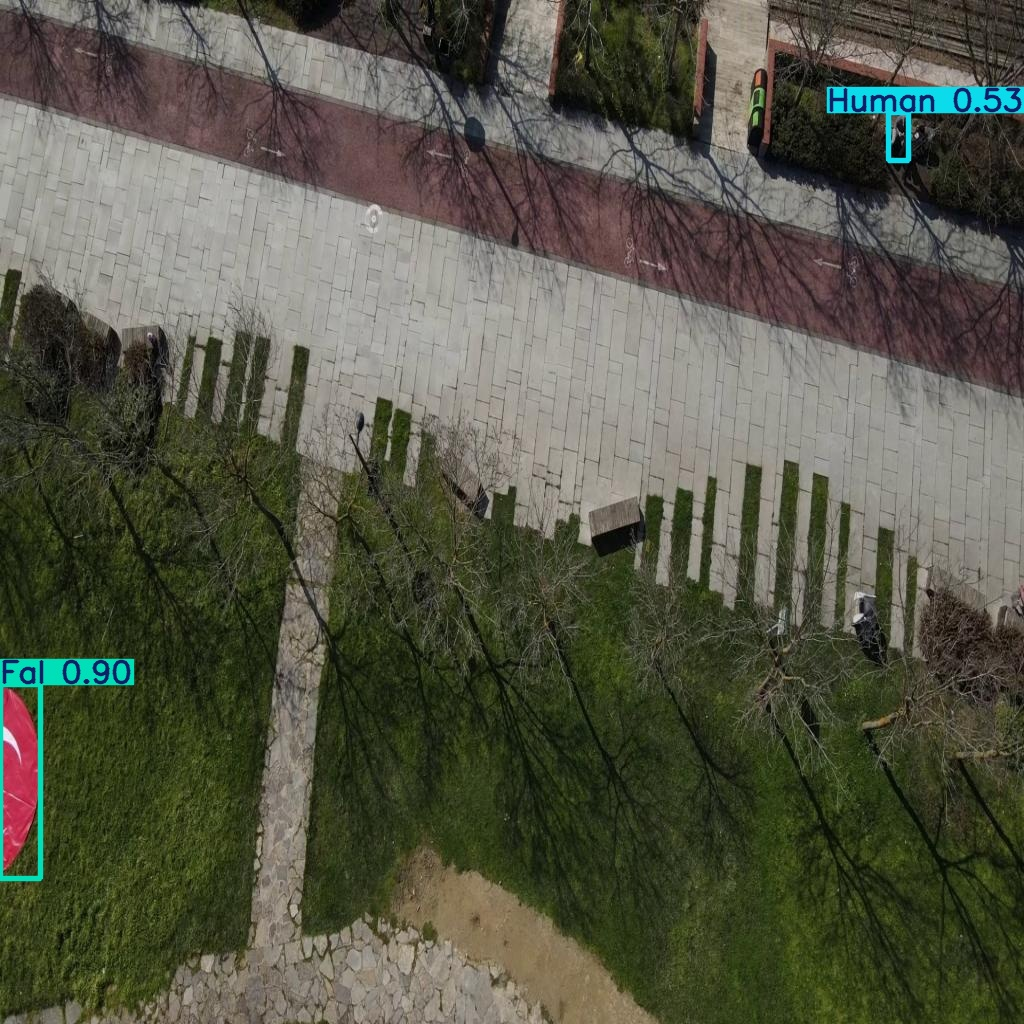

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")